<div align="center">

# MEGR7172/8172

### Computational Methods (Fall 2025)
### Duke 227, Tu/Th 08:30 - 09:45 pm

</div>

# 10 PCA and SVD
Principal Component Analysis (PCA) and Singular Value Decomposition (SVD) are two fundamental techniques in data analysis, dimensionality reduction, and signal processing.

**Principal Component Analysis (PCA)** is a statistical method used to reduce the dimensionality of a dataset while preserving as much variance as possible. It transforms the original variables into a new set of uncorrelated variables called principal components, ordered by the amount of variance they capture from the data. PCA is widely used for data visualization, noise reduction, and feature extraction.

To enable PCA, we need to know **Singular Value Decomposition (SVD)**, a powerful matrix factorization technique that expresses any matrix as the product of three matrices: $U$, $\Sigma$, and $V^T$. SVD is the mathematical foundation behind PCA and is used in many applications such as image compression, signal processing, and solving linear systems.

Both PCA and SVD help to uncover the underlying structure of data, making complex datasets easier to analyze and interpret. In this section, we will explore how these techniques work and how to apply them in practice.

## 10.1 Principle Component Analysis

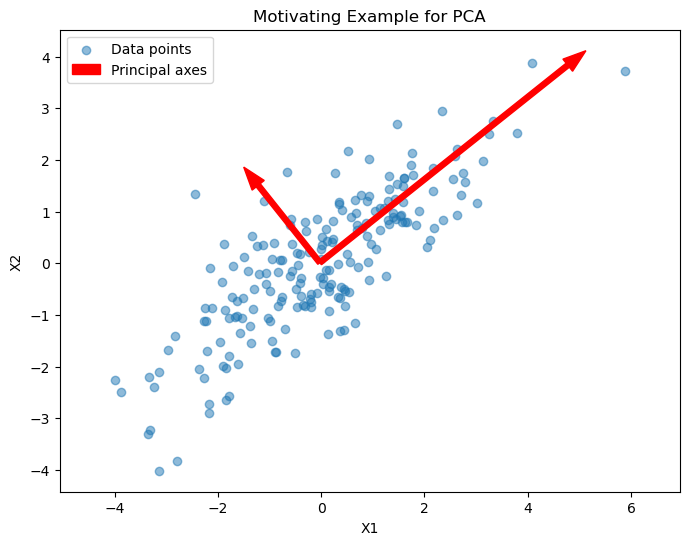

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Generate synthetic 2D data with correlation
np.random.seed(42)
mean = [0, 0]
cov = [[3, 2], [2, 2]]  # correlated variables
X = np.random.multivariate_normal(mean, cov, 200)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Data points')

# Compute and plot principal components
pca = PCA(n_components=2)
pca.fit(X)
origin = np.mean(X, axis=0)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.arrow(origin[0], origin[1], v[0], v[1], 
              color='red', width=0.1, head_width=0.3, label='Principal axes')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Motivating Example for PCA')
plt.legend(['Data points', 'Principal axes'])
plt.axis('equal')
plt.show()

In the previous code cell, we generated a synthetic 2D dataset with correlated variables and visualized it using a scatter plot. We then applied Principal Component Analysis (PCA) to the data to identify the principal axes (directions of maximum variance). The principal components were plotted as red arrows originating from the mean of the data, illustrating how PCA finds the directions that best capture the spread of the data. This example demonstrates how PCA can be used to analyze and visualize the underlying structure of correlated data.
  
The two directions shown by the principal axes represent the directions of maximum variance in the data:

- **First principal component**: This direction captures the largest amount of variance in the dataset. It is the line along which the data is most spread out. Projecting the data onto this axis provides a one-dimensional summary that retains as much information (variance) as possible.
- **Second principal component**: This direction is orthogonal (perpendicular) to the first and captures the next highest variance. In two dimensions, this is the only other possible orthogonal direction.

Imagine you 

**Applications**:
- **Dimensionality reduction**: By projecting high-dimensional data onto the first few principal components, we can reduce the number of variables while preserving most of the information. This is useful for visualization, noise reduction, and speeding up machine learning algorithms.
- **Feature extraction**: Principal components can be used as new features that summarize the original data, often improving the performance of downstream tasks.
- **Data visualization**: PCA allows us to visualize complex, high-dimensional datasets in 2D or 3D by plotting the projections onto the first principal components.
- **Noise filtering**: By keeping only the components with the highest variance, PCA can help remove noise and highlight the underlying structure in the data.
What is the meaning of that two directions? And its application applications?

## 10.2 How to enable PCA in Practice?

Although we can now easily run PCA analysis with the help of scikit learn, what is the mathematics behind the scene?

PCA works by finding new axes (principal components) that maximize the variance in the data. Mathematically, this is achieved by:
1. **Centering the data**: Subtract the mean of each variable from the dataset $X$ so that it is centered at the origin. This step ensures that the first principal component describes the direction of maximum variance.

2. **Computing the covariance matrix**: Calculate the covariance matrix of the centered data to understand how variables vary together. The covariance matrix summarizes the pairwise relationships between variables and is fundamental for identifying the directions of maximum variance.

    For example, in Python:
    ```python
    cov_matrix = np.cov(X, rowvar=False)
    print(cov_matrix)
    ```

The resulting covariance matrix tells us how much each pair of variables in $X$ co-vary. Large off-diagonal values indicate strong correlations between variables, which PCA will exploit to find new, uncorrelated axes (principal components).

Variance is a measure of how much a single random variable fluctuates around its mean.  
For a random variable $X$ with mean $\mu = \mathbb{E}[X]$:

$$
\text{Var}(X) = \mathbb{E}\big[(X - \mu)^2\big]
$$

When we have two random variables, $X$ and $Y$, we often want to know how they vary together.

Covariance generalizes variance to two variables:

$$
\text{Cov}(X, Y) = \mathbb{E}\big[(X - \mu_X)(Y - \mu_Y)\big]
$$

For example, if $X = [0, 2, 3]$ and $Y = [1, 3, -1]$, the covariance can be calculated as follows:

1. Compute the means:  
    $\mu_X = (0 + 2 + 3)/3 = 1.67$  
    $\mu_Y = (1 + 3 + (-1))/3 = 1.0$

2. Compute the covariance:  
    $\text{Cov}(X, Y) = \frac{1}{3} \sum_{i=1}^3 (X_i - \mu_X)(Y_i - \mu_Y)$

    $= \frac{1}{3} \left[(0-1.67)(1-1) + (2-1.67)(3-1) + (3-1.67)((-1)-1)\right]$  
    $= \frac{1}{3} \left[0 + 0.33 \times 2 + 1.33 \times (-2)\right]$  
    $= \frac{1}{3} (0 + 0.66 - 2.66)$  
    $= \frac{-2}{3} \approx -0.67$

A negative covariance indicates that when $X$ is above its mean, $Y$ tends to be below its mean, and vice versa.



3. **Eigen decomposition or SVD**: Find the eigenvalues and eigenvectors of the covariance matrix (or use Singular Value Decomposition, SVD). The eigenvectors define the directions of the principal components, and the eigenvalues indicate the amount of variance captured by each component.


4. **Projecting the data**: Transform the original data onto the new axes (principal components) to obtain a lower-dimensional representation.




Covariance Matrix:
[[2.47984657 1.6435578 ]
 [1.6435578  1.84881264]]
Eigenvalues:
 [3.8378986 0.4907606]
Eigenvectors:
 [[ 0.77088566 -0.63697355]
 [ 0.63697355  0.77088566]]


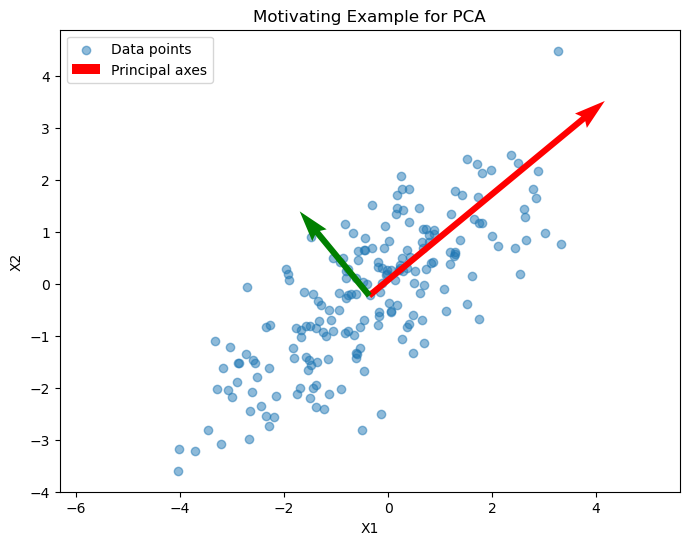

In [3]:
X = np.random.multivariate_normal(mean, cov, 200)
X_centered = X - np.mean(X, axis=0)
cov_matrix = np.cov(X_centered, rowvar=False)
print("Covariance Matrix:")
print(cov_matrix)

# Perform PCA
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Data points')

# Plot principal components
origin = np.mean(X, axis=0)
for i in range(len(eigenvalues)):
    vector = eigenvectors[:, i] * np.sqrt(eigenvalues[i]) * 3
    plt.quiver(*origin, *vector, angles='xy', scale_units='xy', scale=1, color=['r', 'g'][i], width=0.01)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Motivating Example for PCA')
plt.legend(['Data points', 'Principal axes'])
plt.axis('equal')
plt.show()

## 10.3 From Covariance Matrix to Singular Value Decomposition (SVD). 
After centering the data matrix $X$ (shape $n \times d$, with $n$ samples and $d$ features), the sample covariance matrix is

$$
\Sigma = \frac{1}{n-1} X^\top X
$$

Standard PCA computes the eigenvalues and eigenvectors of $\Sigma$.

However, there is a shortcut: we can directly compute the SVD of $X$:

$$
X = U S V^\top
$$

where  
- $U$ ($n \times n$): left singular vectors  
- $S$ ($n \times d$): diagonal matrix of singular values  
- $V$ ($d \times d$): right singular vectors

It follows that

$$
X^\top X = V S^\top U^\top U S V^\top = V S^2 V^\top
$$

- The columns of $V$ (right singular vectors) are exactly the eigenvectors of the covariance matrix $\Sigma$.
- The squared singular values $S^2$ (scaled by $1/(n-1)$) are the eigenvalues of $\Sigma$.

This approach allows us to work directly with the data matrix $X$, without explicitly forming $\Sigma$.




In [6]:
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
n_samples = X_centered.shape[0]
eigvals = (S**2) / (n_samples - 1)
print("Eigenvalues from SVD:\n", eigvals)
print("Right singular vectors (Principal components):\n", Vt.T)

Eigenvalues from SVD:
 [3.8378986 0.4907606]
Right singular vectors (Principal components):
 [[ 0.77088566 -0.63697355]
 [ 0.63697355  0.77088566]]


## 10.4 Discussions

1. What is the cost of performing PCA with the eigendecomposition method?
2. What is the cost of performing PCA with the SVD approach?
3. Brainstorm PCA applications.